ggshow
======
Produce ggplot2 graphs from Python

## Requirements

- Python 3.5+
- `Rscript` command and the R environment with `ggplot2` package installed

## Functionalities
- `ggshow`: Draw graph using ggplot2 on R and return the Image object that you can show on Jupyter notebook
- `ggwrite`: Draw graph using ggplot2 on R and save it to a file.
- `%gg`, `%%gg`: ipython magic for drawing ggplot2 graph.

In [1]:
from ggshow import ggshow, ggwrite

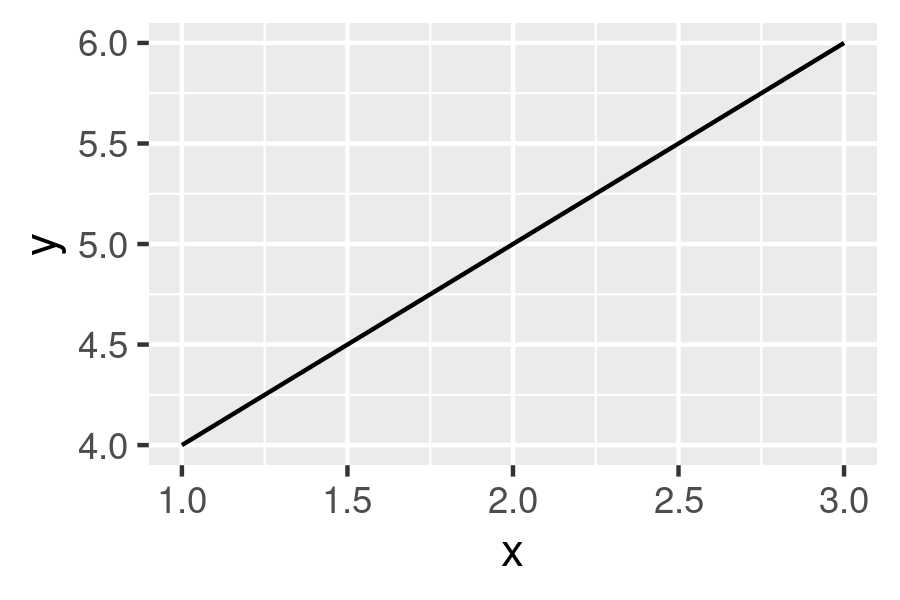

In [2]:
# Minimal example
# pass R code to produce ggplot graph to ggshow function
# note: ggplot2 is automatically imported
ggshow("""
  x <- c(1,2,3)
  y <- c(4,5,6)
  qplot(x, y, geom="line")
""", savesize=(3, 2))

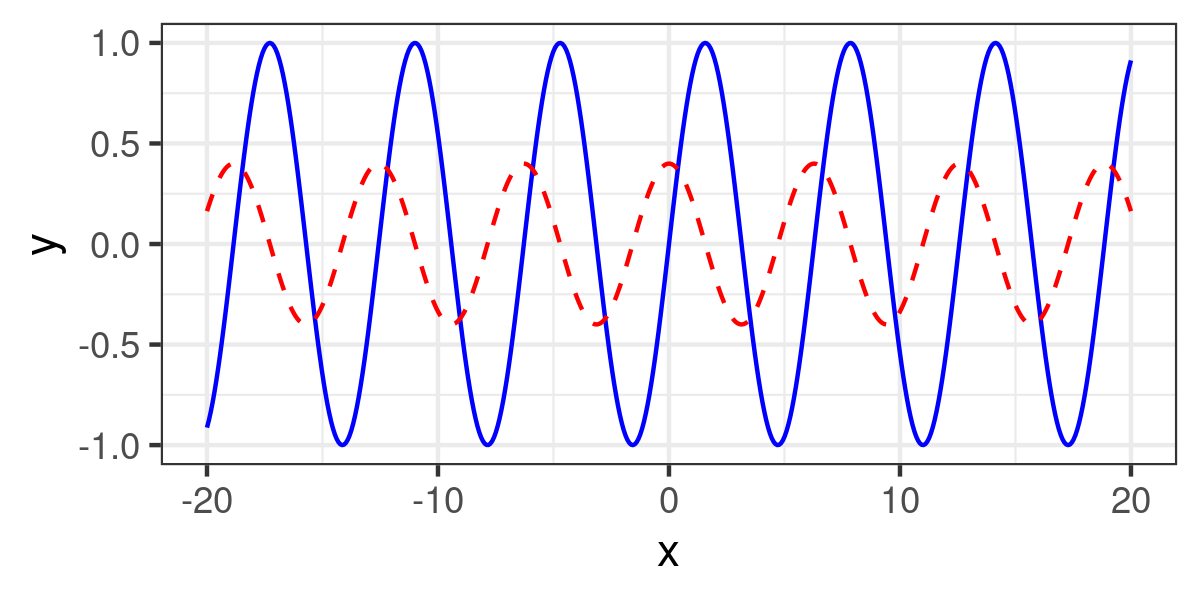

In [3]:
# Example with data frames
# pass pandas data frames as keyword arguments
# then you can use them in the R code
import numpy as np
import pandas as pd
x = np.linspace(-20, 20, 500)
y = np.sin(x)
y2 = 0.4*np.cos(x)

df1 = pd.DataFrame({"x":x, "y":y})
df2 = pd.DataFrame({"x":x, "y":y2})
ggshow("""
  ggplot(a, aes(x, y)) + 
    geom_line(color="blue") +
    geom_line(data=b, linetype="dashed", color="red") +
    theme_bw()
""", dispwidth=400, savesize=(4, 2), a=df1, b=df2)

In [4]:
# Example to save the graph to a file
ggwrite("""
    x <- c(1,2,3)
    y <- c(4,5,6)
    qplot(x, y, geom="line")
""", "foo.jpg", savesize=(4, 2))

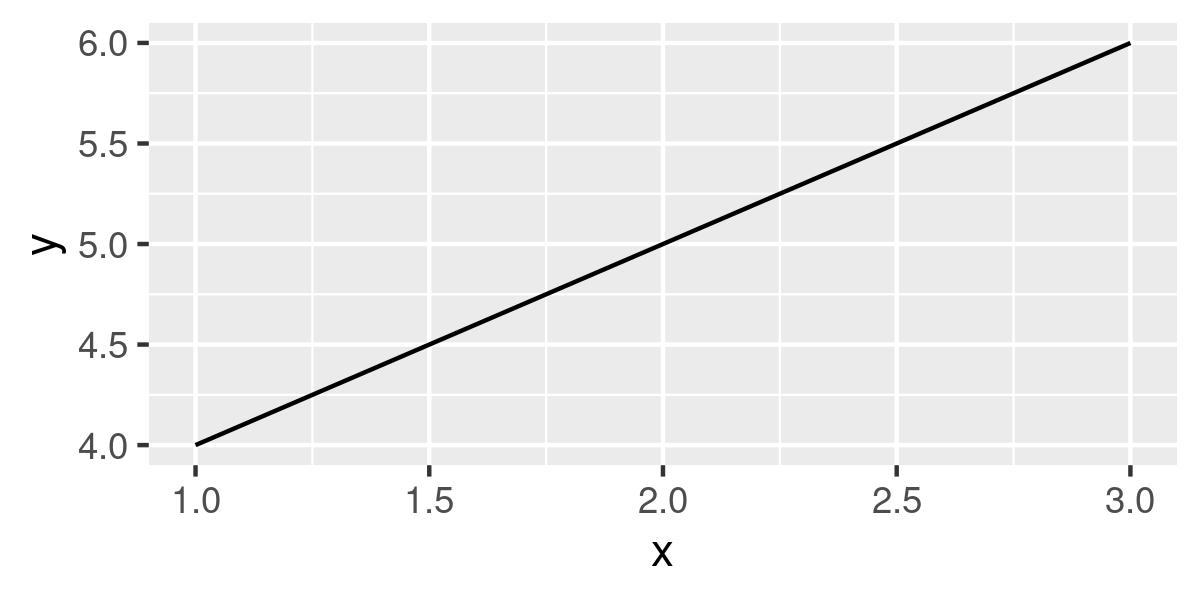

In [5]:
from IPython.display import Image
Image("foo.jpg", width=400)

In [6]:
# Example using %gg magic
%load_ext ggshow

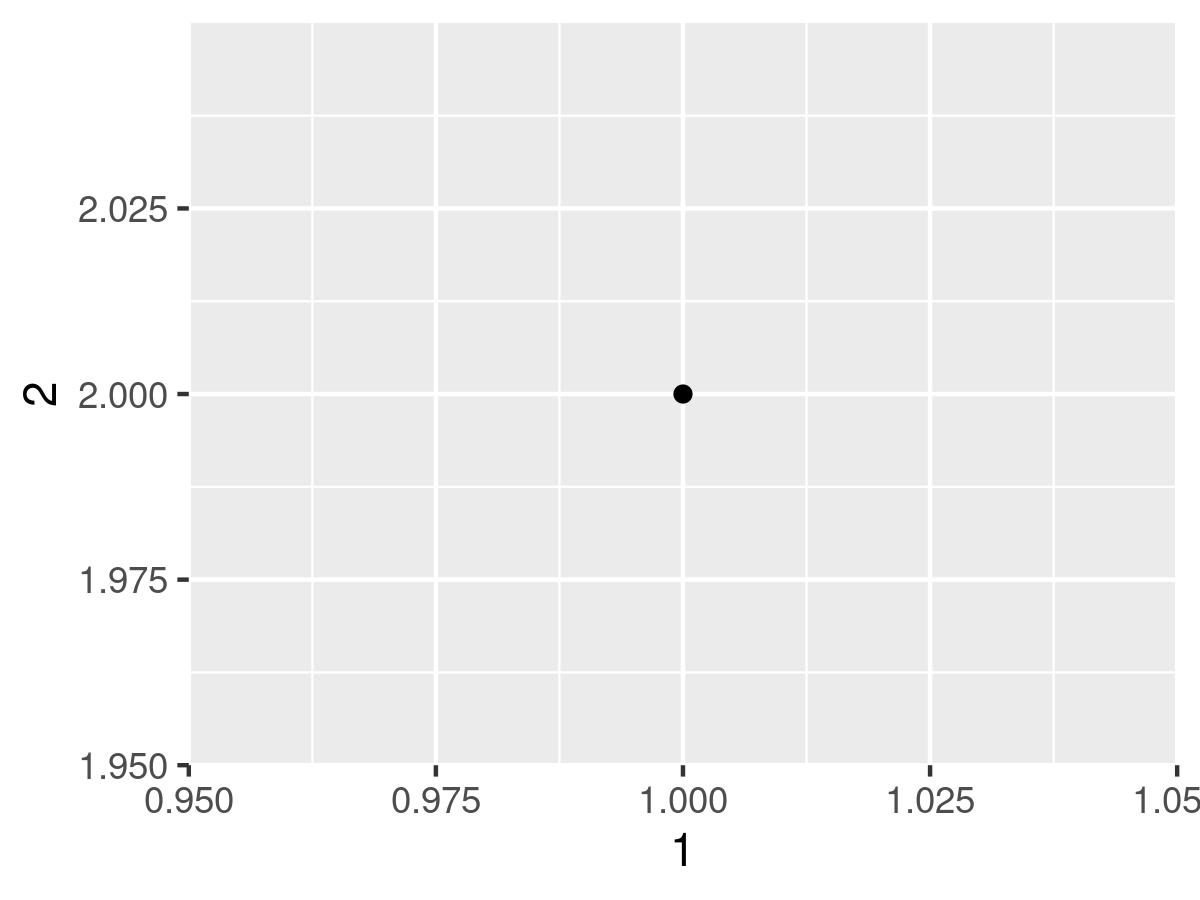

In [7]:
## line magic
%gg qplot(1, 2) -s 4 3 --dispwidth 300

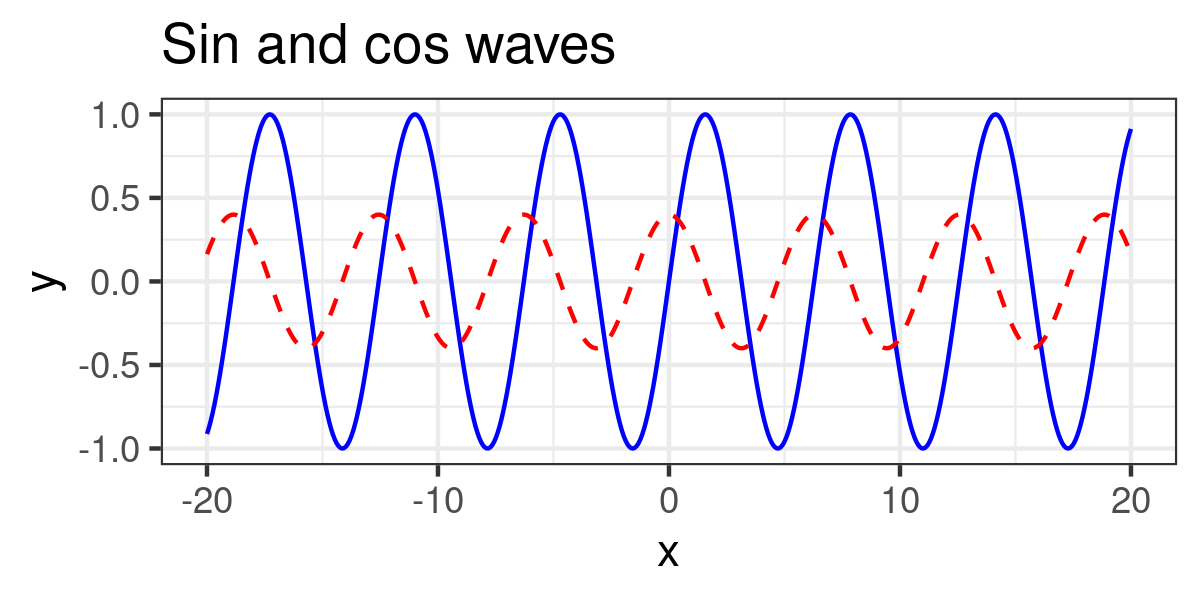

In [8]:
## line magic with the code as a string variable
x = np.linspace(-20, 20, 500)
y = np.sin(x)
y2 = 0.4*np.cos(x)

df1 = pd.DataFrame({"x":x, "y":y})
df2 = pd.DataFrame({"x":x, "y":y2})
code = """
ggplot(a, aes(x, y)) + 
  geom_line(color="blue") +
  geom_line(data=b, linetype="dashed", color="red") +
  theme_bw() +
  ggtitle("Sin and cos waves")
"""

%gg {code} -s 4 2 --dispwidth 400 --data a=df1 b=df2

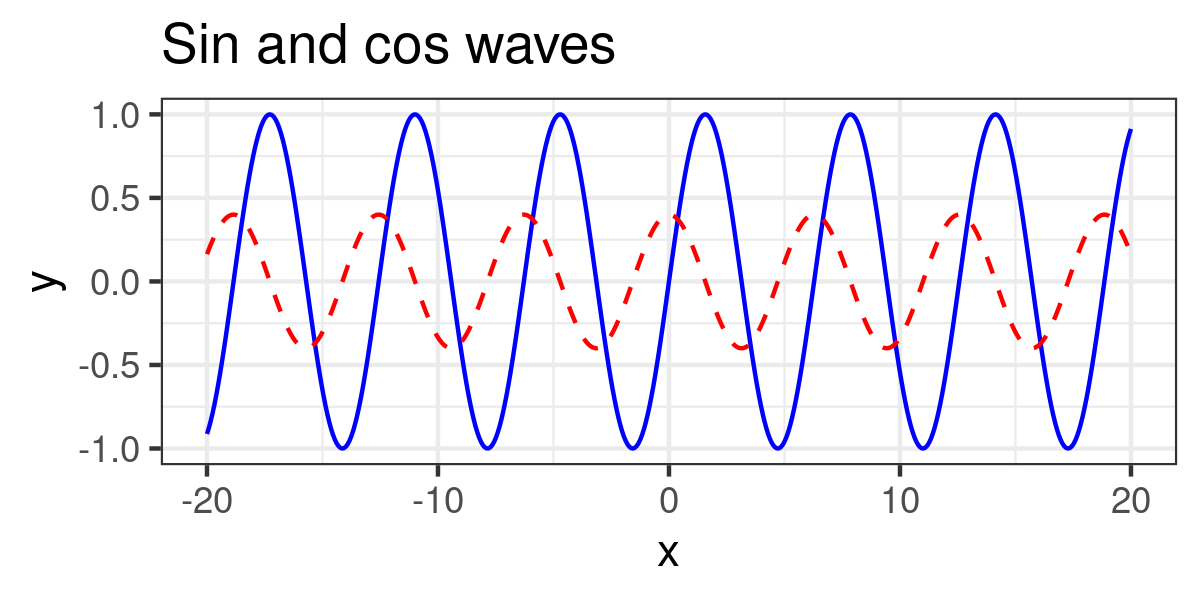

In [9]:
%%gg -s 4 2 --dispwidth 400 --data a=df1 b=df2

## cell magic
ggplot(a, aes(x, y)) + 
  geom_line(color="blue") +
  geom_line(data=b, linetype="dashed", color="red") +
  theme_bw() +
  ggtitle("Sin and cos waves")

In [10]:
# show the full command options
%gg --help

Help on method gg in module ggshow:

gg(line, cell=None) method of ggshow.GGMagic instance
    ::
    
      %gg [--help] [-s SAVESIZE SAVESIZE] [--scale SCALE] [--units UNITS]
              [--dpi DPI] [-w DISPWIDTH] [-h DISPHEIGHT]
              [--libs [LIBS [LIBS ...]]] [--data [DATA [DATA ...]]]
              [plotcode [plotcode ...]]
    
    positional arguments:
      plotcode              R code
    
    optional arguments:
      --help
      -s <SAVESIZE SAVESIZE>, --savesize <SAVESIZE SAVESIZE>
                            height, width
      --scale SCALE         ggsave option scale
      --units UNITS         ggsave option units
      --dpi DPI             ggsave option dpi
      -w DISPWIDTH, --dispwidth DISPWIDTH
                            display width
      -h DISPHEIGHT, --dispheight DISPHEIGHT
                            display width
      --libs <[LIBS [LIBS ...]]>
                            R libraries to use
      --data <[DATA [DATA ...]]>
                     

In [11]:
# By default, we use 'Rscript' as the command to run R code.
# If this is not a valid command on the environment,
# we can still use the functions by
# specifying the right one using set_rscript function.
from ggshow import config, set_rscript

set_rscript("/usr/bin/Rscript")  
print(config.rscript)
# this is just the full path of the command on this environment
# so the command will work in the same way

/usr/bin/Rscript
